In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [3]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

# pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NoisyGRU/max_epochs=500 n_samples=1000 latent_size=64 seed=0 learning_rate=0.001/'
pathTT = HOME_DIR + "content/trained_models/task-trained/tt_3bff/"
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


# path_GRU_Sweep = pathTT + "20240503_Fig1_NBFF_GRU_TT_GRU_Sweep/"
path_GRU_Sweep = pathTT + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240702_GRU_3BFF/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

# path_LDS_Sweep = pathTT + "20240503_Fig1_NBFF_LDS_TT_GRU_Sweep/"
# # path_LDS_Sweep = HOME_DIR + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/content/trained_models/task-trained/20240703_LDS_3BFF/"
# subfolders_LDS = [f.path for f in os.scandir(path_LDS_Sweep) if f.is_dir()]

# path_NODE_Sweep = pathTT + "20240503_Fig1_NBFF_NODE_TT_GRU_Sweep/"
path_NODE_Sweep = pathTT + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240702_NODE_3BFF/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


FileNotFoundError: [Errno 2] No such file or directory: '/home/csverst/Github/CtDBenchmark/content/trained_models/task-trained/20240702_GRU_3BFF/'

In [ ]:

from ctd.comparison.analysis.external.ext import Analysis_Ext
slds_path = "/home/csverst/Github/CtDBenchmark/sldsV2/"

slds3_1 = Analysis_Ext(run_name = "SLDS3_1", filepath = slds_path + "slds_3bff_v2_3_Run1.h5")
slds3_2 = Analysis_Ext(run_name = "SLDS3_3", filepath = slds_path + "slds_3bff_v2_3_Run2.h5")
slds3_3 = Analysis_Ext(run_name = "SLDS3_4", filepath = slds_path + "slds_3bff_v2_3_Run3.h5")
slds3_4 = Analysis_Ext(run_name = "SLDS3_4", filepath = slds_path + "slds_3bff_v2_3_Run4.h5")
slds3_5 = Analysis_Ext(run_name = "SLDS3_5", filepath = slds_path + "slds_3bff_v2_3_Run5.h5")
slds8_1 = Analysis_Ext(run_name = "SLDS8_1", filepath = slds_path + "slds_3bff_v2_8_Run1.h5")
slds8_2 = Analysis_Ext(run_name = "SLDS8_2", filepath = slds_path + "slds_3bff_v2_8_Run2.h5")
slds8_3 = Analysis_Ext(run_name = "SLDS8_3", filepath = slds_path + "slds_3bff_v2_8_Run3.h5")
slds8_4 = Analysis_Ext(run_name = "SLDS8_4", filepath = slds_path + "slds_3bff_v2_8_Run4.h5")
slds8_5 = Analysis_Ext(run_name = "SLDS8_5", filepath = slds_path + "slds_3bff_v2_8_Run5.h5")

<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>


In [ ]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTGRU_Sweep")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LDS:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")

train_true_rates = analysis_GRU.get_true_rates(phase = 'train')
eval_true_rates = analysis_GRU.get_true_rates(phase = 'val')

slds3_1.add_true_rates(train_true_rates, eval_true_rates)
slds3_2.add_true_rates(train_true_rates, eval_true_rates)
slds3_3.add_true_rates(train_true_rates, eval_true_rates)
slds3_4.add_true_rates(train_true_rates, eval_true_rates)
slds3_5.add_true_rates(train_true_rates, eval_true_rates)
slds8_1.add_true_rates(train_true_rates, eval_true_rates)
slds8_2.add_true_rates(train_true_rates, eval_true_rates)
slds8_3.add_true_rates(train_true_rates, eval_true_rates)
slds8_4.add_true_rates(train_true_rates, eval_true_rates)
slds8_5.add_true_rates(train_true_rates, eval_true_rates)

comparison.load_analysis(slds3_1, group = "SLDS3")
comparison.load_analysis(slds3_2, group = "SLDS3")
comparison.load_analysis(slds3_3, group = "SLDS3")
comparison.load_analysis(slds3_4, group = "SLDS3")
comparison.load_analysis(slds3_5, group = "SLDS3")
comparison.load_analysis(slds8_1, group = "SLDS8")
comparison.load_analysis(slds8_2, group = "SLDS8")
comparison.load_analysis(slds8_3, group = "SLDS8")
comparison.load_analysis(slds8_4, group = "SLDS8")
comparison.load_analysis(slds8_5, group = "SLDS8")

comparison.regroup()

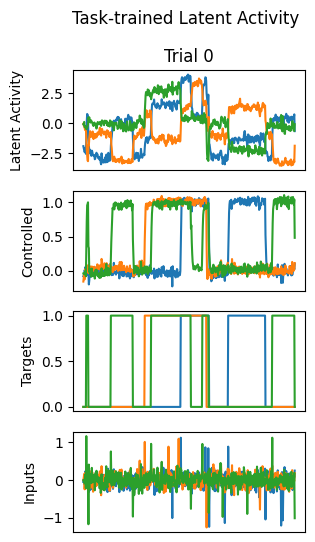

In [ ]:
an_TT.plot_trial_io(num_trials=1)

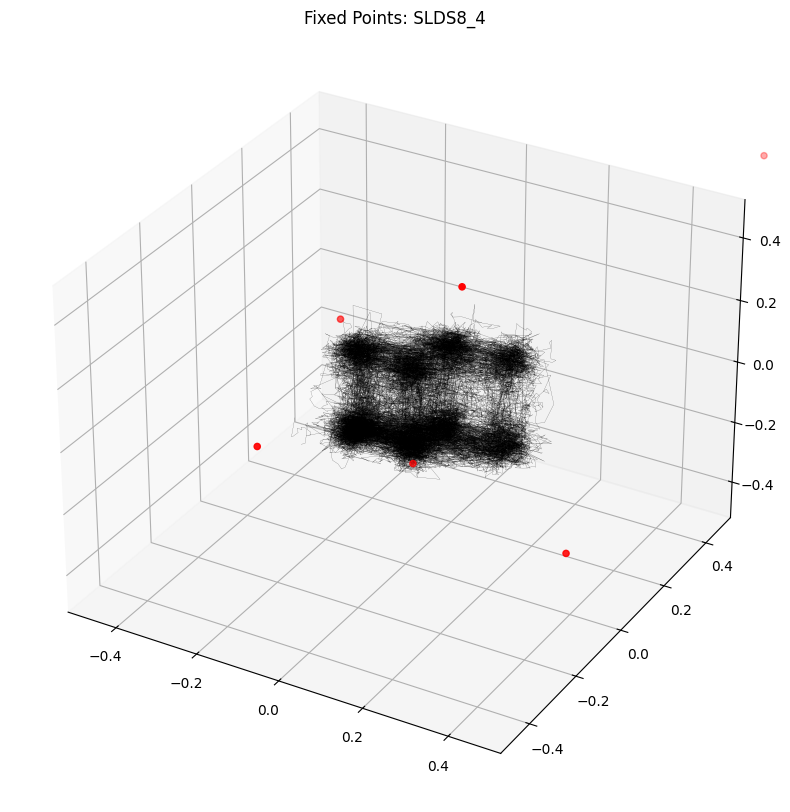

In [ ]:
slds_list = [slds8_4]
for slds in slds_list:
    slds.plot_fps()

Working on 1 of 26: GRU
Group: GRU
Rate R2: 0.912585290122728
State R2: 0.032264558214511775
Working on 2 of 26: GRU
Group: GRU
Rate R2: 0.9148674460053501
State R2: 0.0318975977309595
Working on 3 of 26: GRU
Group: GRU
Rate R2: 0.9118454285234909
State R2: 0.03213920728149706
Working on 4 of 26: GRU
Group: GRU
Rate R2: 0.916188334479326
State R2: 0.03266900192260175
Working on 5 of 26: GRU
Group: GRU
Rate R2: 0.921672103724355
State R2: 0.03378214674389526
Working on 6 of 26: LDS
Group: LDS
Rate R2: 0.3393845359432237
State R2: 0.0797133441939058
Working on 7 of 26: LDS
Group: LDS
Rate R2: 0.34187185215123495
State R2: 0.06716861498578755
Working on 8 of 26: LDS
Group: LDS
Rate R2: 0.33949464793479545
State R2: 0.07746769835082283
Working on 9 of 26: LDS
Group: LDS
Rate R2: 0.28787122836893253
State R2: 0.10773821642795339
Working on 10 of 26: LDS
Group: LDS
Rate R2: 0.32964056790696733
State R2: 0.07797807303886597
Working on 11 of 26: NODE
Group: NODE
Rate R2: 0.7714216139547273
Sta

array([[0.91258529, 0.03226456],
       [0.91486745, 0.0318976 ],
       [0.91184543, 0.03213921],
       [0.91618833, 0.032669  ],
       [0.9216721 , 0.03378215],
       [0.33938454, 0.07971334],
       [0.34187185, 0.06716861],
       [0.33949465, 0.0774677 ],
       [0.28787123, 0.10773822],
       [0.32964057, 0.07797807],
       [0.77142161, 0.03715247],
       [0.76749295, 0.03089477],
       [0.77008892, 0.03386409],
       [0.77591696, 0.03465468],
       [0.7644176 , 0.03236029],
       [0.66323807, 0.02740548],
       [0.69557041, 0.03827809],
       [0.69643752, 0.02786105],
       [0.67095086, 0.02963474],
       [0.71417901, 0.03337036],
       [0.72168566, 0.03523296],
       [0.71508213, 0.03120659],
       [0.72287778, 0.03373671],
       [0.72309281, 0.03297652],
       [0.70855832, 0.03085345],
       [0.        , 0.        ]])

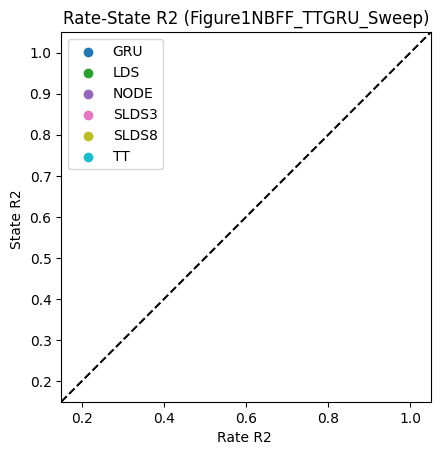

In [ ]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict = plot_dict)

In [ ]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

tt_latents = an_TT.get_latents(phase = 'val').detach().cpu().numpy()
gru_latents = analysis_GRU.get_latents(phase = 'val').detach().cpu().numpy()
lds_latents = analysis_LDS.get_latents(phase = 'val').detach().cpu().numpy()
node_latents = analysis_NODE.get_latents(phase = 'val').detach().cpu().numpy()

print(tt_latents.shape)
print(gru_latents.shape)
print(lds_latents.shape)
print(node_latents.shape)

# dict1 = {
#     'tt': tt_latents,
#     'gru': gru_latents,
#     'lds': lds_latents,
#     'node': node_latents
# }

# # Save dict as pickle
# import pickle
# with open('latents.pkl', 'wb') as f:
#     pickle.dump(dict1, f)


(200, 500, 64)
(200, 500, 128)
(200, 500, 64)
(200, 500, 3)


(100000, 64)


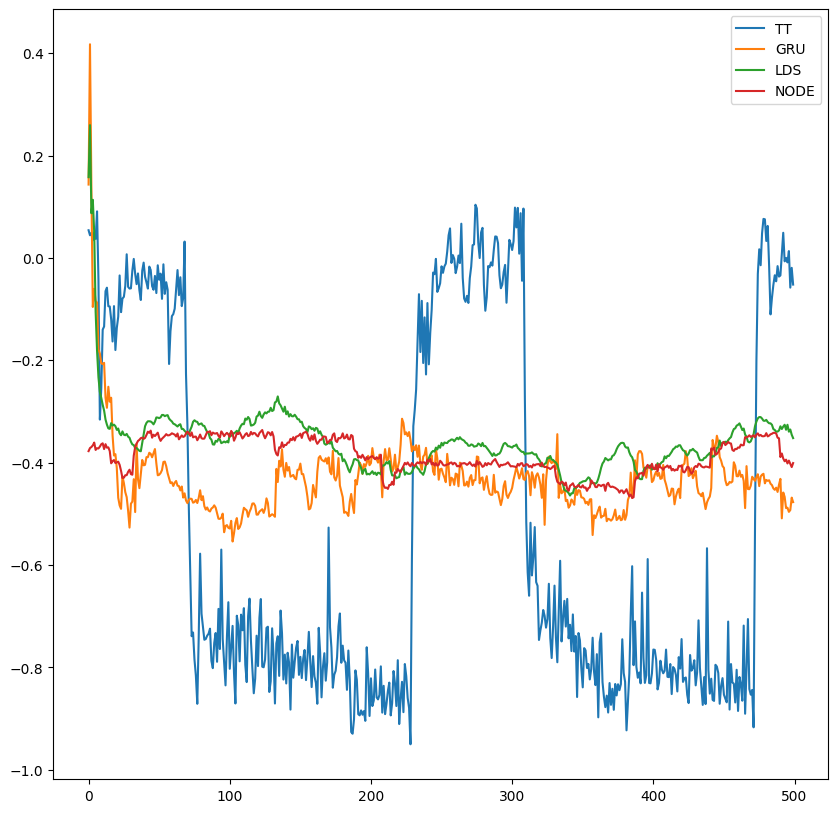

In [ ]:
lr_gru = LinearRegression()
lr_lds = LinearRegression()
lr_node = LinearRegression()

tt_latents_flat = tt_latents.reshape(-1, tt_latents.shape[-1])
gru_latents_flat = gru_latents.reshape(-1, gru_latents.shape[-1])
lds_latents_flat = lds_latents.reshape(-1, lds_latents.shape[-1])
node_latents_flat = node_latents.reshape(-1, node_latents.shape[-1])

lr_gru.fit(gru_latents_flat, tt_latents_flat)
lr_lds.fit(lds_latents_flat, tt_latents_flat)
lr_node.fit(node_latents_flat, tt_latents_flat)


gru_latents_pred = lr_gru.predict(gru_latents_flat)
lds_latents_pred = lr_lds.predict(lds_latents_flat)
node_latents_pred = lr_node.predict(node_latents_flat)

print(gru_latents_pred.shape)
gru_lats_tt = gru_latents_pred.reshape(tt_latents.shape)
lds_lats_tt = lds_latents_pred.reshape(tt_latents.shape)
node_lats_tt = node_latents_pred.reshape(tt_latents.shape)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(tt_latents[0,:,0], label = "TT")
ax.plot(gru_lats_tt[0,:,0], label = "GRU")
ax.plot(lds_lats_tt[0,:,0], label = "LDS")
ax.plot(node_lats_tt[0,:,0], label = "NODE")

ax.legend()


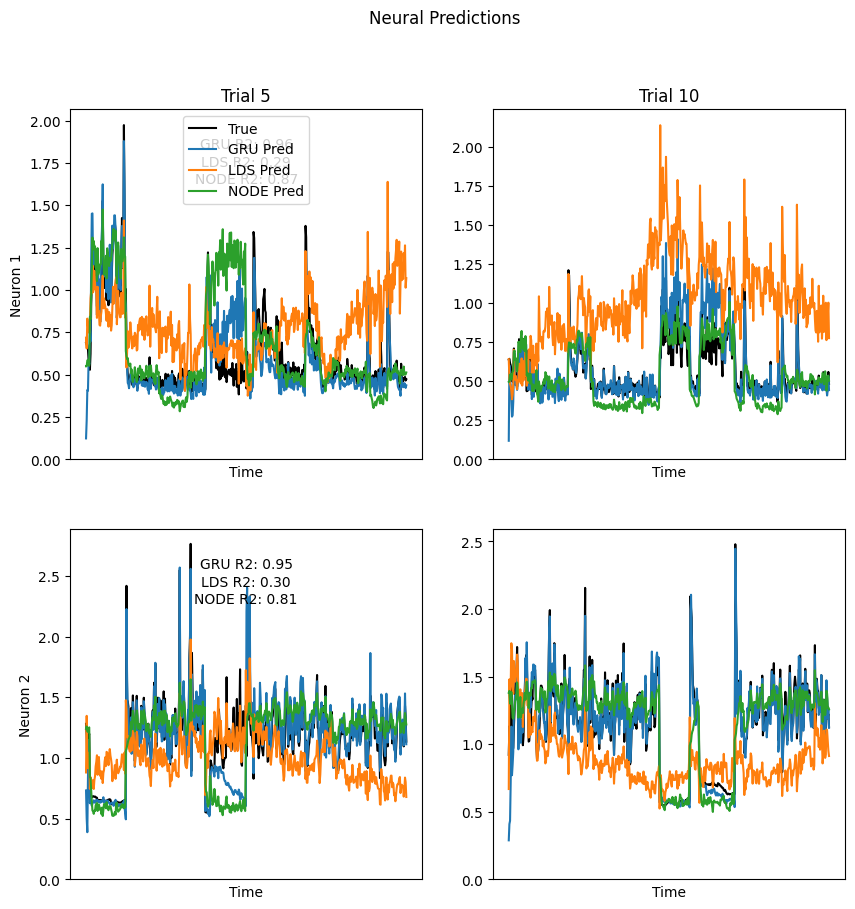

In [ ]:
r2_vals = comparison_single.plot_neural_preds(neuron_list =[1,2], trial_list = [5,10])

In [ ]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_DTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.load_analysis(slds3_1, group = "SLDS3")
comparison_single.regroup()

#comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)
# comparison_single.plot_trials_reference_dims(num_trials=2, dims = [0,1,2,3])


In [ ]:

def visualize_stateR2(comp, num_trials=2, ref_ind = None, pcs_to_plot = [7,8,9,10,11]):
    self = comp
    if ref_ind is None:
        ref_ind = self.ref_ind
    if ref_ind is None and self.ref_ind is None:
        # Throw an error
        raise ValueError("No reference index provided")
    ref_lats = (
        self.analyses[ref_ind]
        .get_latents(
            phase="val",
        )
        .detach()
        .numpy()
    )
    pca = PCA()
    ref_lats_flat = ref_lats.reshape(
        ref_lats.shape[0] * ref_lats.shape[1], ref_lats.shape[2]
    )
    ref_lats_pca_flat = pca.fit_transform(ref_lats_flat)
    ref_lats_pca = ref_lats_pca_flat.reshape(ref_lats.shape)

    fig = plt.figure(figsize = (20,10))
    axes = fig.subplots(self.num_analyses, len(pcs_to_plot))
    for i in range(self.num_analyses):
        latents = self.analyses[i].get_latents(phase="val").detach().numpy()
        pca_DT = PCA()

        lats_flat = latents.reshape(
            latents.shape[0] * latents.shape[1], latents.shape[2]
        )
        lats_pca_flat = pca_DT.fit_transform(lats_flat)

        reg = LinearRegression().fit(ref_lats_pca_flat, lats_pca_flat)
        pred_latents_pca_flat = reg.predict(ref_lats_pca_flat)
        r2_scores = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='raw_values')
        var_r2_score = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='variance_weighted')
        print(f"R2 Score for {self.analyses[i].run_name}: {var_r2_score}")
        pred_latents_pca = pred_latents_pca_flat.reshape(latents.shape)
        lats_pca = lats_pca_flat.reshape(latents.shape)

        for j in range(len(pcs_to_plot)):
            pc_num = pcs_to_plot[j] + 1
            if pc_num < latents.shape[2]:
                axes[i, j].plot(pred_latents_pca[0, :100, pc_num], c = 'r', label="Predicted from TT")
                axes[i, j].plot(lats_pca[0, :100, pc_num], c = 'k', label = "True from DT")
                axes[i, j].text(75, .01, s= f"R2: {r2_scores[pc_num]:.2f}")
            else:
                axes[i, j].plot(np.zeros(lats_pca[0, :100, 0].shape), label = "Predicted from TT") 
            if i == self.num_analyses - 1:
                axes[i, j].set_xlabel("Time")
            else:
                axes[i, j].set_xticks([])

        axes[i, 0].set_ylabel(f"{self.analyses[i].run_name}")
    plt.savefig(f"state_r2_dims.pdf")

array([0.45368234, 0.30736608, 0.23895158, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

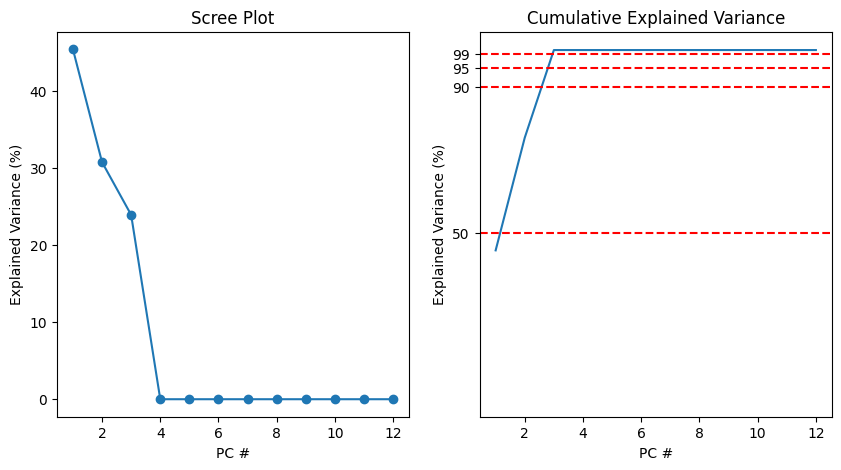

In [ ]:
analysis_NODE.plot_scree(max_pcs = 12   )

array([0.25197928, 0.21452528, 0.1960061 , 0.02773342, 0.02471059,
       0.02418226, 0.01231171, 0.01175901, 0.01061519, 0.00883634,
       0.00812954, 0.00799814])

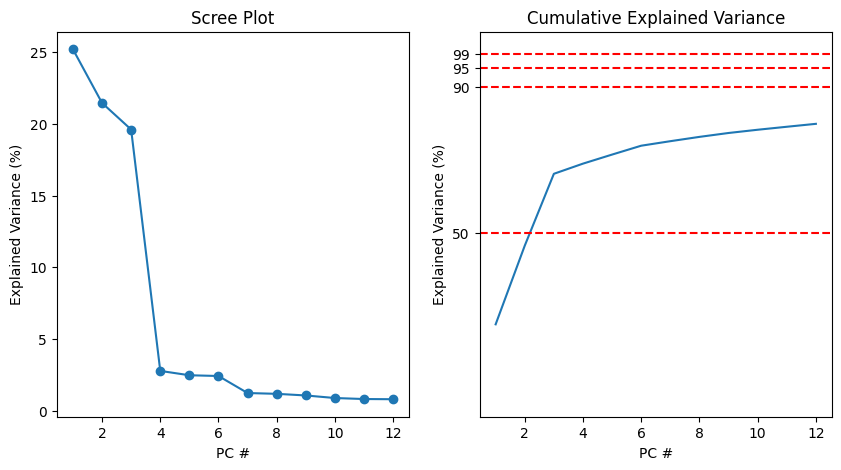

In [ ]:
analysis_GRU.plot_scree(max_pcs = 12)

array([0.42630112, 0.26783701, 0.21513856, 0.03008881, 0.02162444,
       0.01622897, 0.0064479 , 0.00463996, 0.00377971, 0.00253571,
       0.0015604 , 0.00092548])

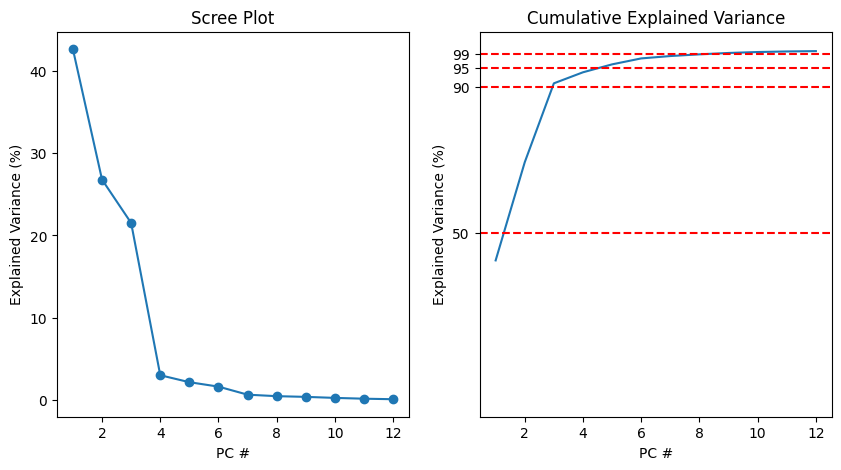

In [ ]:
analysis_LDS.plot_scree(max_pcs = 12)

R2 Score for GRU: 0.03474704913731828
R2 Score for LDS: 0.08274751867617944
R2 Score for NODE: 0.03957106231425253
R2 Score for SLDS3_1: 0.04019784243249755
R2 Score for TT: 0.9890873781460843


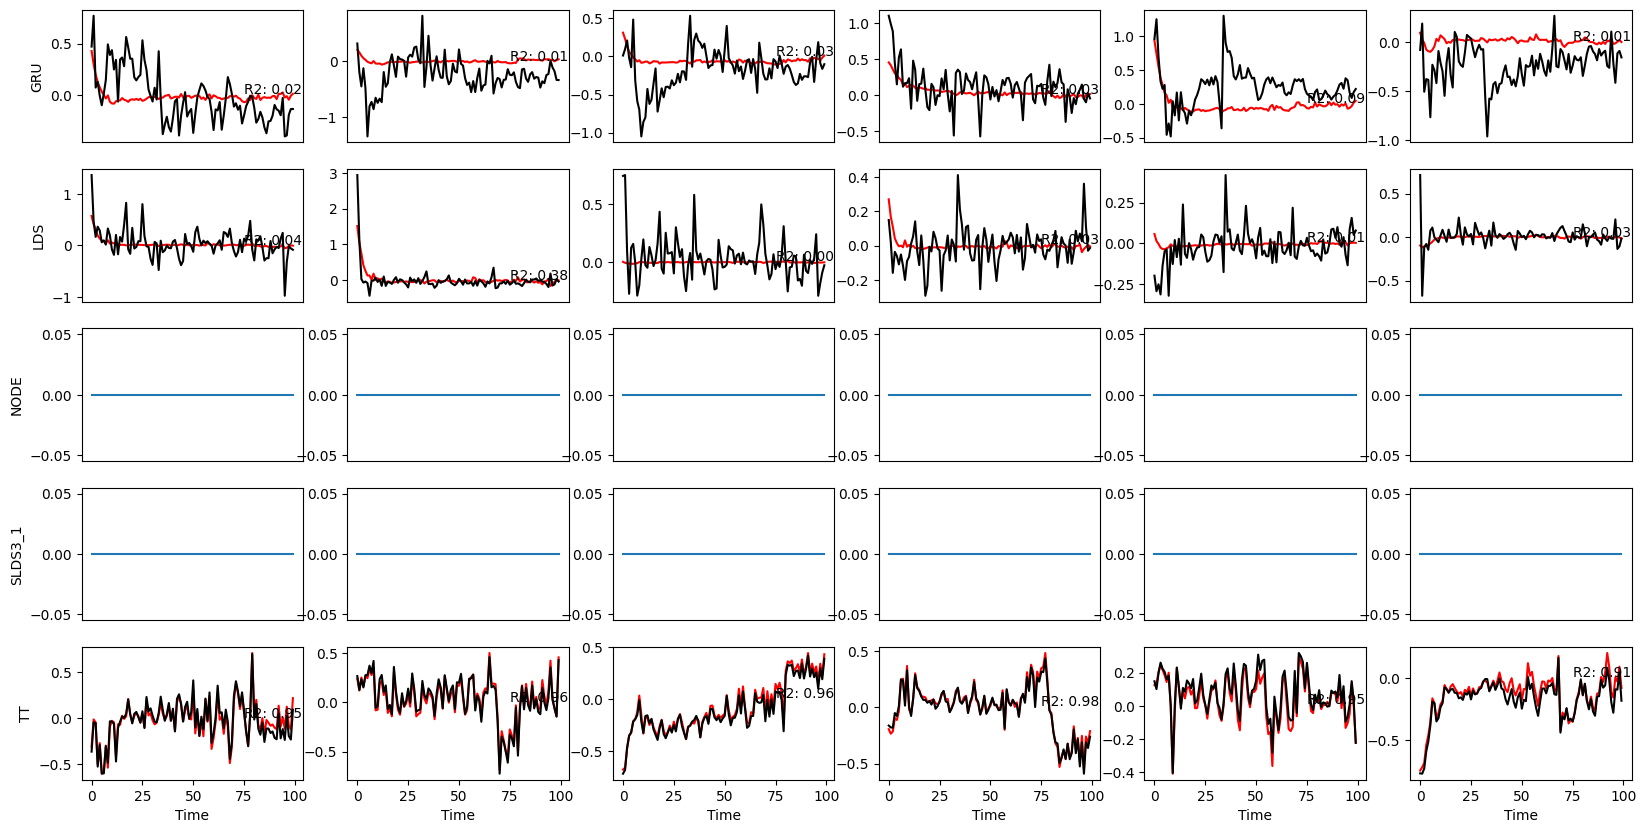

In [ ]:

visualize_stateR2(comparison_single, pcs_to_plot=[7,8,9,10,11,12])


Iteration 500/40000
q = 4.83E-04 +/- 2.01E-03
dq = 1.77E-06 +/- 8.07E-06

Iteration 1000/40000
q = 1.48E-04 +/- 5.94E-04
dq = 2.47E-07 +/- 1.12E-06

Iteration 1500/40000
q = 7.35E-05 +/- 2.59E-04
dq = 8.82E-08 +/- 3.91E-07

Iteration 2000/40000
q = 4.36E-05 +/- 1.37E-04
dq = 4.41E-08 +/- 1.58E-07

Iteration 2500/40000
q = 2.84E-05 +/- 8.37E-05
dq = 3.02E-08 +/- 8.23E-08

Iteration 3000/40000
q = 1.96E-05 +/- 5.53E-05
dq = 2.34E-08 +/- 5.97E-08

Iteration 3500/40000
q = 1.40E-05 +/- 3.84E-05
dq = 2.10E-08 +/- 5.24E-08

Iteration 4000/40000
q = 1.03E-05 +/- 2.76E-05
dq = 2.91E-08 +/- 9.68E-08

Iteration 4500/40000
q = 7.78E-06 +/- 2.03E-05
dq = 3.41E-08 +/- 1.02E-07

Iteration 5000/40000
q = 5.96E-06 +/- 1.51E-05
dq = 4.57E-08 +/- 1.33E-07

Iteration 5500/40000
q = 4.63E-06 +/- 1.15E-05
dq = 6.08E-08 +/- 1.55E-07

Iteration 6000/40000
q = 3.73E-06 +/- 8.91E-06
dq = 7.83E-08 +/- 1.84E-07

Iteration 6500/40000
q = 3.08E-06 +/- 7.01E-06
dq = 1.16E-07 +/- 2.82E-07

Iteration 7000/40000
q = 

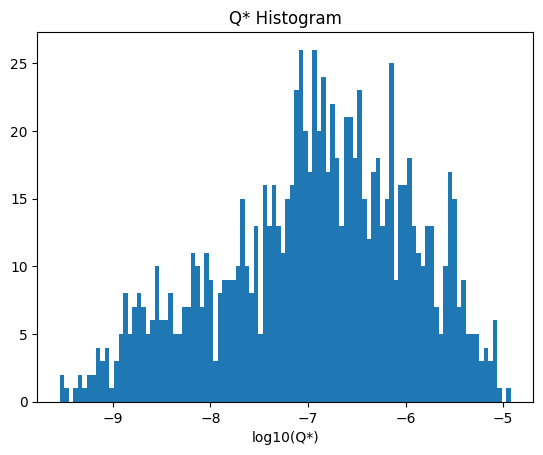

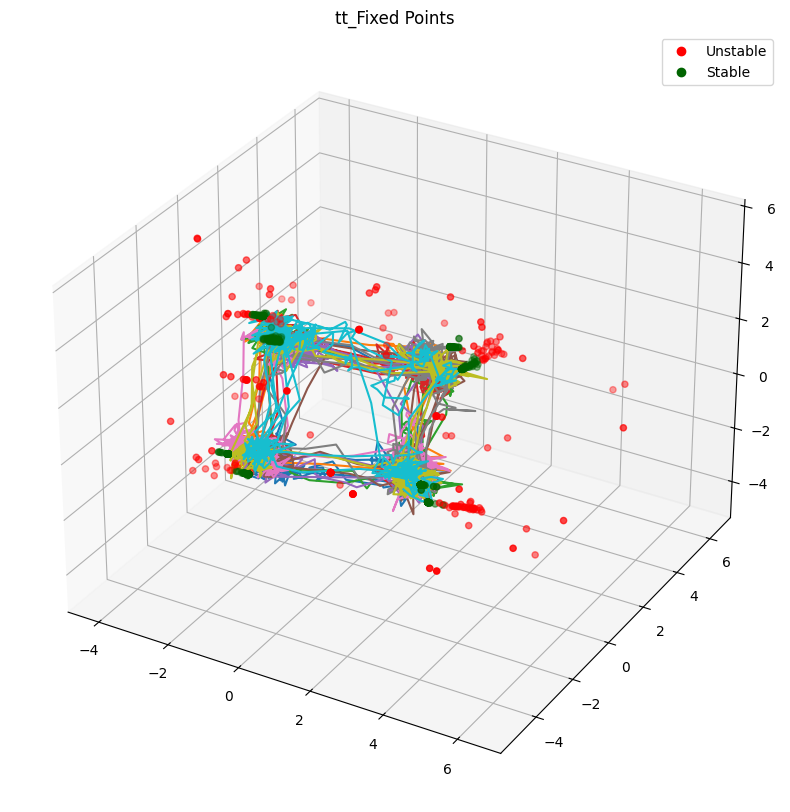

In [ ]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 1.49E-03 +/- 9.20E-03
dq = 5.26E-06 +/- 4.18E-05

Iteration 1000/40000
q = 4.52E-04 +/- 2.19E-03
dq = 7.70E-07 +/- 4.30E-06

Iteration 1500/40000
q = 2.26E-04 +/- 1.01E-03
dq = 2.66E-07 +/- 1.29E-06

Iteration 2000/40000
q = 1.35E-04 +/- 5.83E-04
dq = 1.46E-07 +/- 6.87E-07

Iteration 2500/40000
q = 8.89E-05 +/- 3.73E-04
dq = 9.27E-08 +/- 3.60E-07

Iteration 3000/40000
q = 6.19E-05 +/- 2.53E-04
dq = 1.23E-07 +/- 5.85E-07

Iteration 3500/40000
q = 4.51E-05 +/- 1.79E-04
dq = 2.18E-07 +/- 8.22E-07

Iteration 4000/40000
q = 3.38E-05 +/- 1.29E-04
dq = 2.85E-07 +/- 8.85E-07

Iteration 4500/40000
q = 2.59E-05 +/- 9.44E-05
dq = 3.73E-07 +/- 1.01E-06

Iteration 5000/40000
q = 2.05E-05 +/- 6.99E-05
dq = 5.32E-07 +/- 1.47E-06

Iteration 5500/40000
q = 1.65E-05 +/- 5.24E-05
dq = 6.24E-07 +/- 1.59E-06

Iteration 6000/40000
q = 1.37E-05 +/- 3.97E-05
dq = 6.40E-07 +/- 1.58E-06

Iteration 6500/40000
q = 1.16E-05 +/- 3.04E-05
dq = 8.06E-07 +/- 1.90E-06

Iteration 7000/40000
q = 

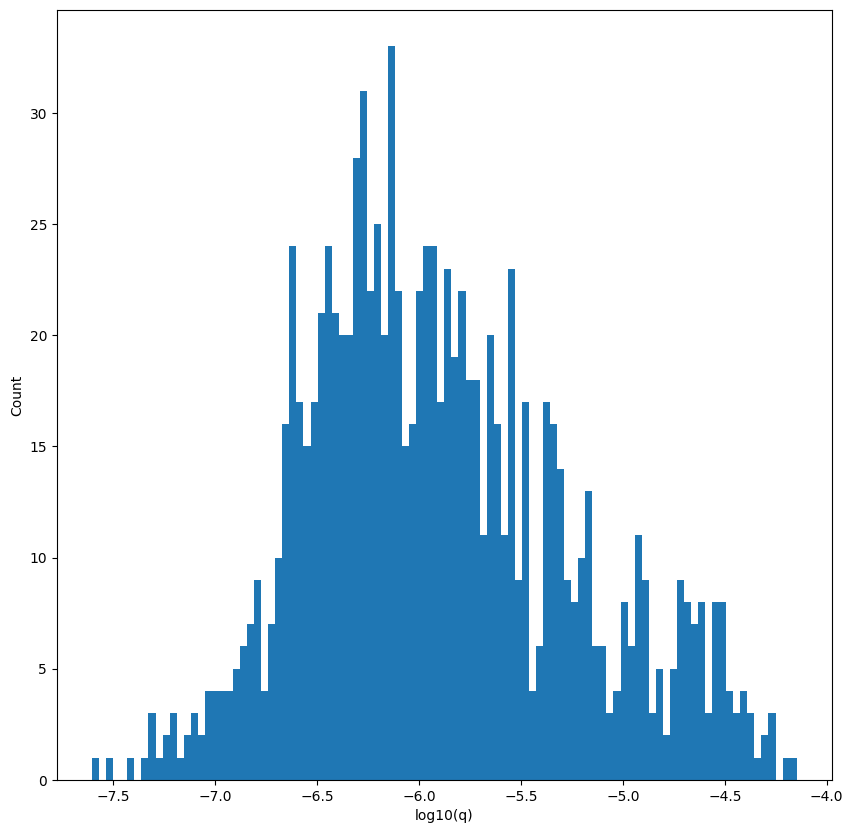

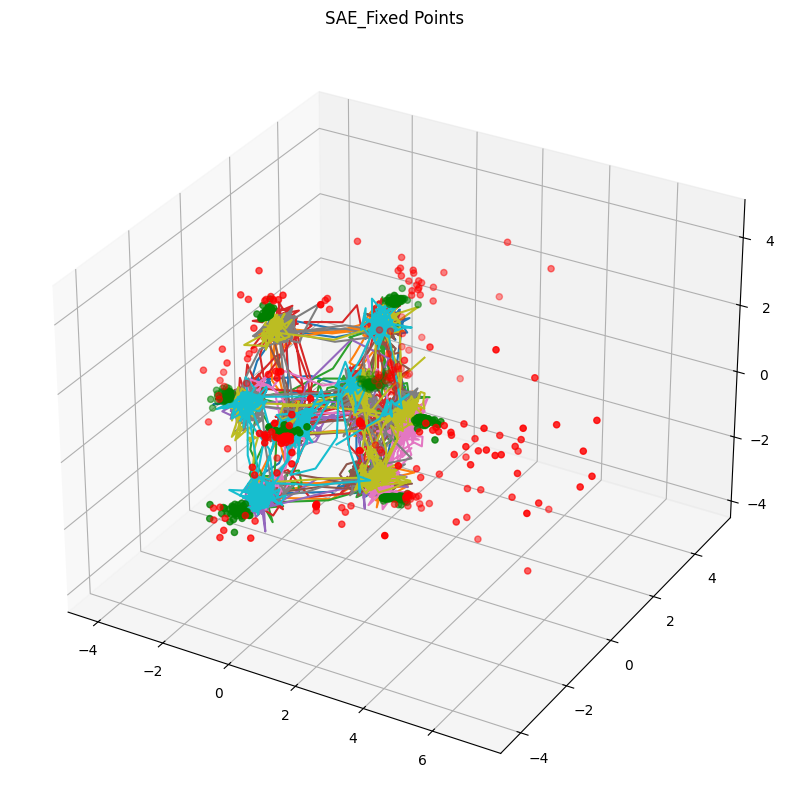

In [ ]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 7.75E-06 +/- 1.61E-04
dq = 2.08E-09 +/- 2.33E-08

Iteration 1000/40000
q = 3.81E-10 +/- 1.15E-08
dq = 3.41E-11 +/- 8.63E-10

Iteration 1500/40000
q = 8.37E-11 +/- 2.63E-09
dq = 6.78E-11 +/- 2.15E-09

Iteration 2000/40000
q = 1.25E-10 +/- 2.68E-09
dq = 3.97E-11 +/- 8.06E-10

Iteration 2500/40000
q = 2.44E-10 +/- 4.12E-09
dq = 1.92E-10 +/- 4.70E-09

Iteration 3000/40000
q = 2.87E-10 +/- 5.93E-09
dq = 2.14E-10 +/- 6.03E-09

Iteration 3500/40000
q = 8.09E-10 +/- 1.30E-08
dq = 2.58E-10 +/- 3.67E-09

Iteration 4000/40000
q = 6.33E-10 +/- 1.39E-08
dq = 1.55E-10 +/- 1.93E-09

Iteration 4500/40000
q = 5.11E-10 +/- 7.83E-09
dq = 2.56E-10 +/- 4.15E-09

Iteration 5000/40000
q = 1.15E-09 +/- 1.40E-08
dq = 5.65E-10 +/- 6.78E-09

Iteration 5500/40000
q = 2.99E-10 +/- 4.75E-09
dq = 1.77E-10 +/- 3.39E-09

Iteration 6000/40000
q = 7.45E-10 +/- 9.90E-09
dq = 2.82E-10 +/- 3.43E-09

Iteration 6500/40000
q = 1.18E-09 +/- 1.20E-08
dq = 4.15E-10 +/- 3.87E-09

Iteration 7000/40000
q = 

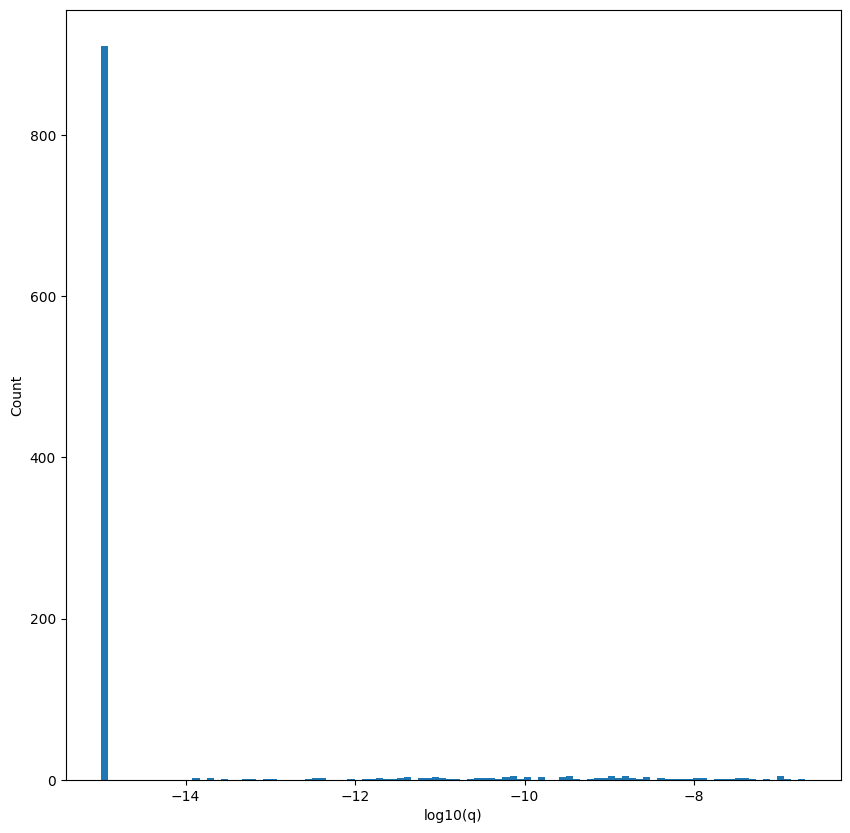

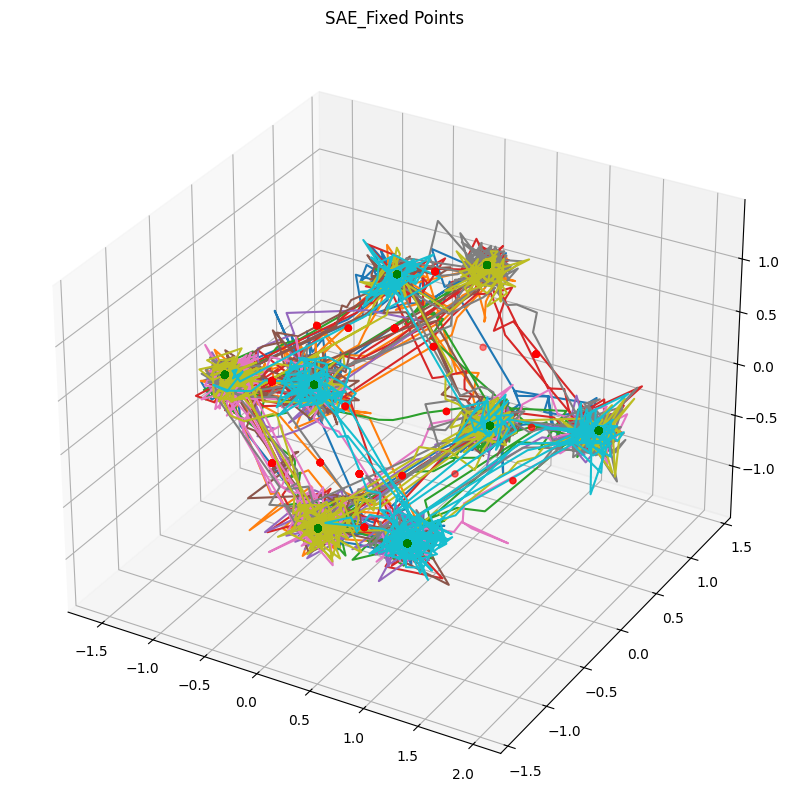

In [ ]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 8.22E-04 +/- 1.97E-03
dq = 7.67E-07 +/- 1.58E-05

Iteration 1000/40000
q = 6.99E-04 +/- 8.57E-04
dq = 1.47E-07 +/- 2.07E-07

Iteration 1500/40000
q = 6.18E-04 +/- 7.78E-04
dq = 1.76E-07 +/- 2.30E-07

Iteration 2000/40000
q = 5.29E-04 +/- 6.95E-04
dq = 1.90E-07 +/- 2.41E-07

Iteration 2500/40000
q = 4.37E-04 +/- 6.12E-04
dq = 1.95E-07 +/- 2.44E-07

Iteration 3000/40000
q = 3.48E-04 +/- 5.33E-04
dq = 1.90E-07 +/- 2.29E-07

Iteration 3500/40000
q = 2.69E-04 +/- 4.59E-04
dq = 1.92E-07 +/- 2.74E-07

Iteration 4000/40000
q = 2.00E-04 +/- 3.91E-04
dq = 1.76E-07 +/- 3.25E-07

Iteration 4500/40000
q = 1.45E-04 +/- 3.31E-04
dq = 1.92E-07 +/- 3.42E-07

Iteration 5000/40000
q = 1.02E-04 +/- 2.78E-04
dq = 1.87E-07 +/- 3.57E-07

Iteration 5500/40000
q = 7.05E-05 +/- 2.31E-04
dq = 2.14E-07 +/- 4.27E-07

Iteration 6000/40000
q = 4.79E-05 +/- 1.89E-04
dq = 2.54E-07 +/- 5.12E-07

Iteration 6500/40000
q = 3.24E-05 +/- 1.52E-04
dq = 3.03E-07 +/- 6.61E-07

Iteration 7000/40000
q = 

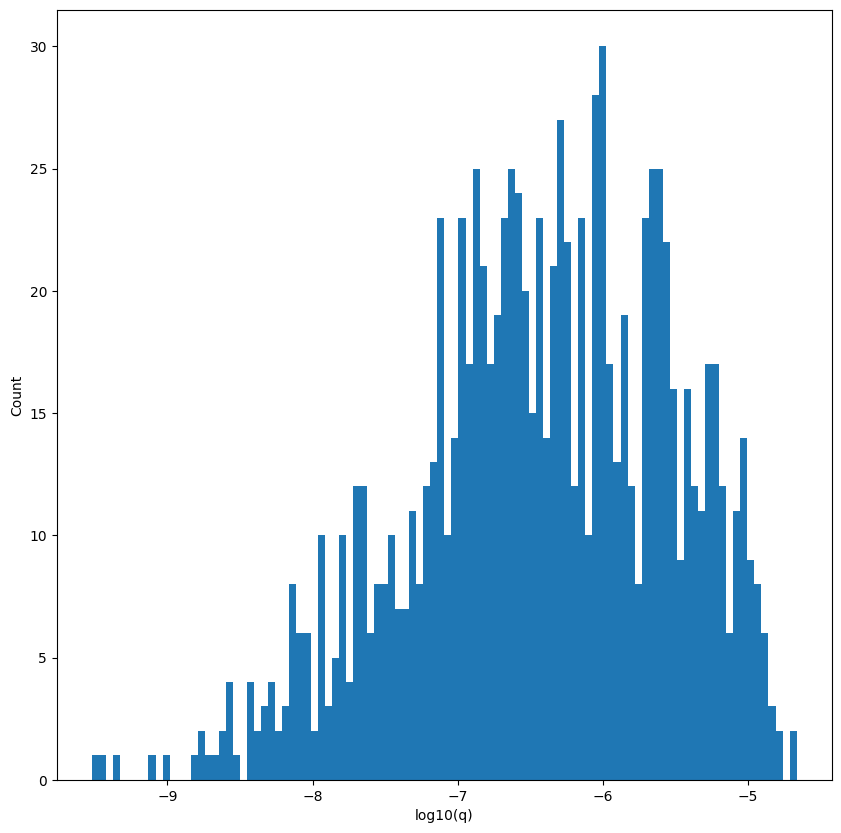

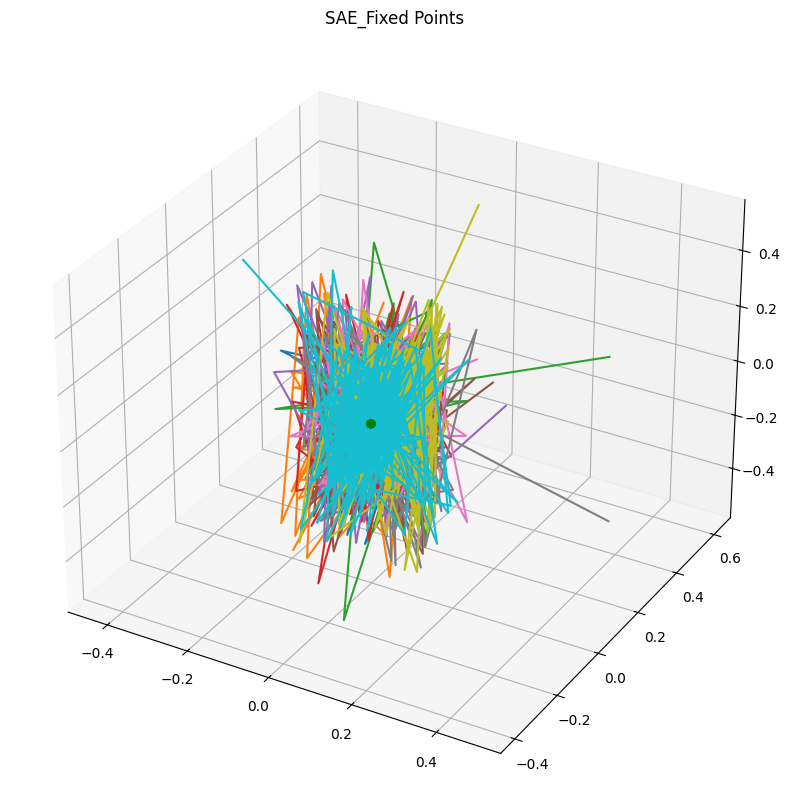

In [ ]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

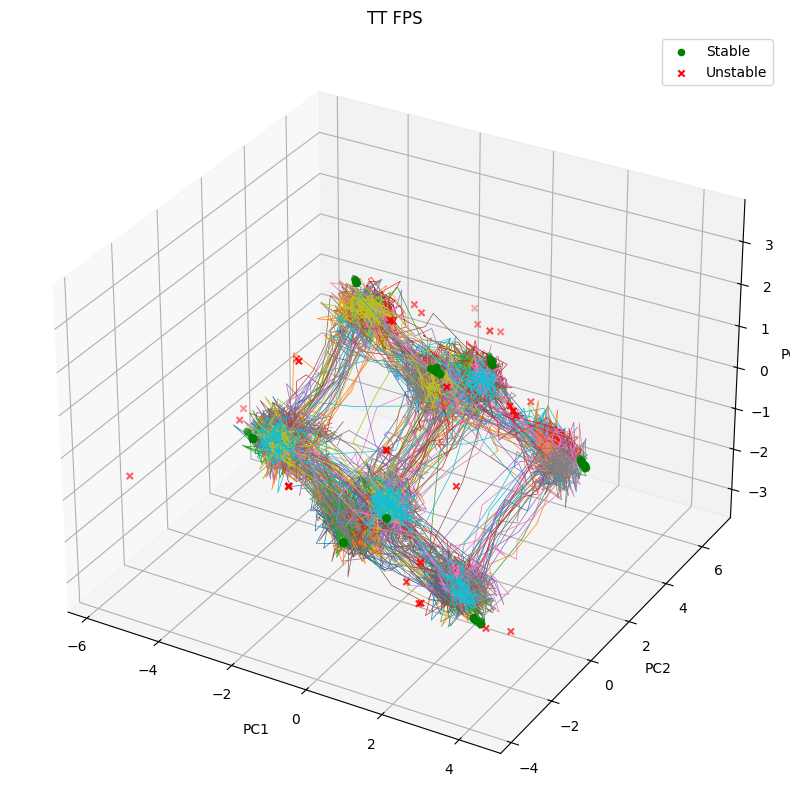

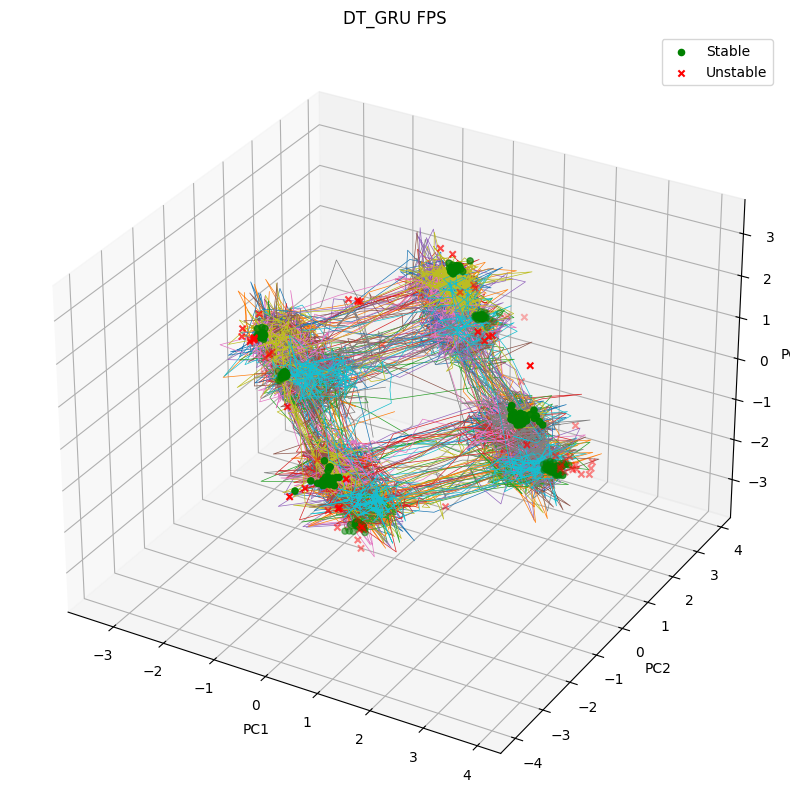

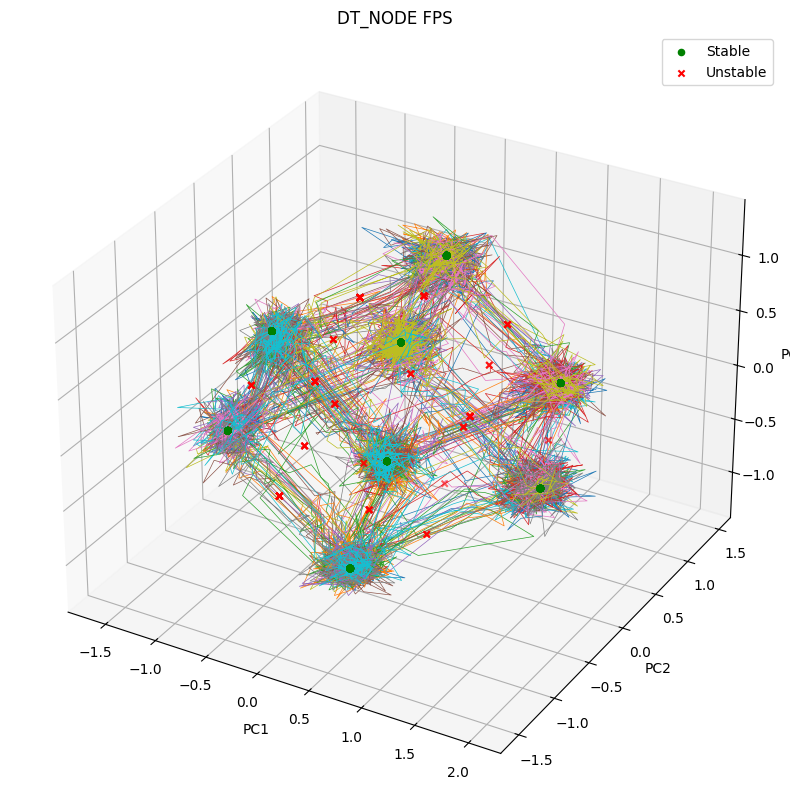

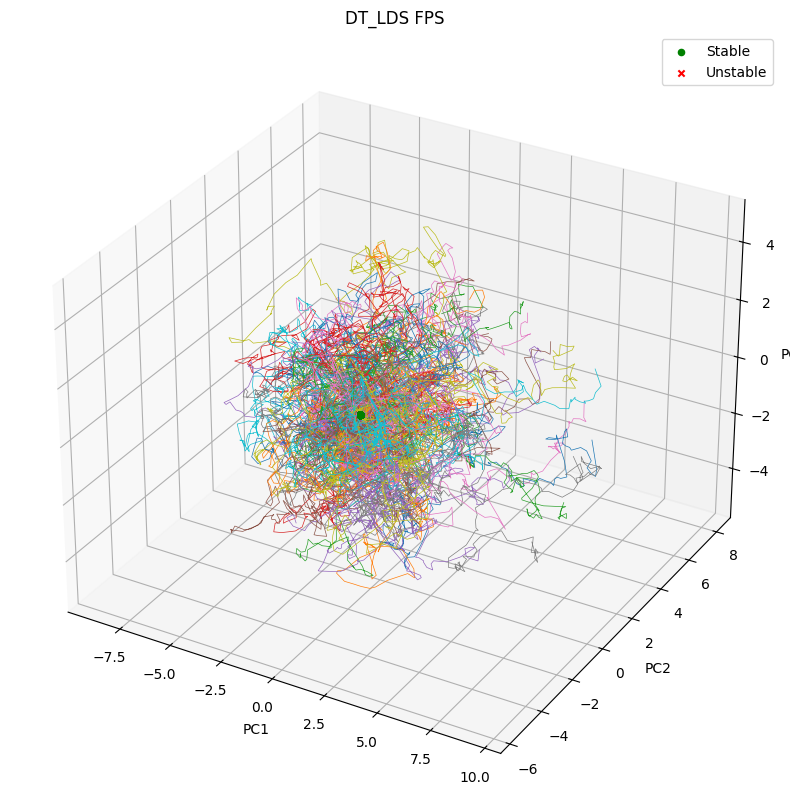

In [ ]:
lats_TT = an_TT.get_latents().detach().numpy()
lats_GRU = analysis_GRU.get_latents().detach().numpy()
lats_NODE = analysis_NODE.get_latents().detach().numpy()
lats_LDS = analysis_LDS.get_latents().detach().numpy()

plot_model_fps(fpsTT, latents=lats_TT, q_thresh = 1e-7, label = "TT")
plot_model_fps(fpsDT_GRU, latents = lats_GRU, q_thresh = 1e-6, label = "DT_GRU")
plot_model_fps(fpsDT_NODE, latents = lats_NODE, q_thresh = 1e-7, label = "DT_NODE")
plot_model_fps(fpsDT_LDS, latents = lats_LDS, q_thresh = 1e-7, label = "DT_LDS")

In [ ]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

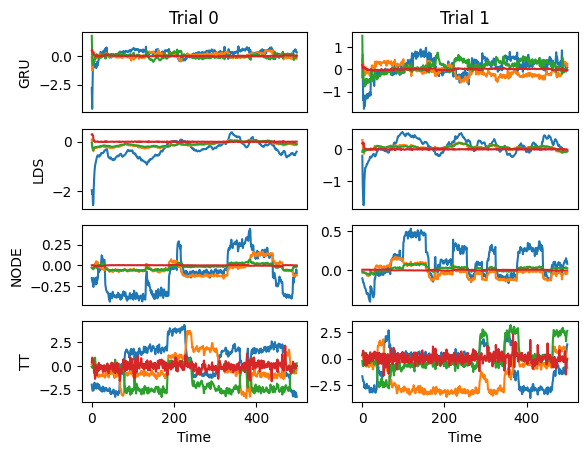

In [ ]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)


Iteration 500/20000
q = 2.23E-02 +/- 1.05E-01
dq = 1.08E-04 +/- 4.37E-04

Iteration 1000/20000
q = 3.17E-03 +/- 2.23E-02
dq = 9.13E-06 +/- 5.60E-05

Iteration 1500/20000
q = 1.23E-03 +/- 7.95E-03
dq = 1.35E-06 +/- 1.55E-05

Iteration 2000/20000
q = 8.76E-04 +/- 3.08E-03
dq = 3.40E-07 +/- 6.10E-06

Iteration 2500/20000
q = 7.71E-04 +/- 1.32E-03
dq = 1.26E-07 +/- 2.25E-06

Iteration 3000/20000
q = 7.25E-04 +/- 9.17E-04
dq = 6.95E-08 +/- 6.09E-07

Iteration 3500/20000
q = 6.93E-04 +/- 8.46E-04
dq = 6.24E-08 +/- 1.32E-07

Iteration 4000/20000
q = 6.60E-04 +/- 8.10E-04
dq = 7.08E-08 +/- 9.89E-08

Iteration 4500/20000
q = 6.22E-04 +/- 7.74E-04
dq = 8.21E-08 +/- 1.11E-07

Iteration 5000/20000
q = 5.78E-04 +/- 7.33E-04
dq = 9.38E-08 +/- 1.24E-07

Iteration 5500/20000
q = 5.29E-04 +/- 6.89E-04
dq = 1.04E-07 +/- 1.33E-07

Iteration 6000/20000
q = 4.74E-04 +/- 6.41E-04
dq = 1.12E-07 +/- 1.39E-07

Iteration 6500/20000
q = 4.17E-04 +/- 5.91E-04
dq = 1.17E-07 +/- 1.43E-07

Iteration 7000/20000
q = 

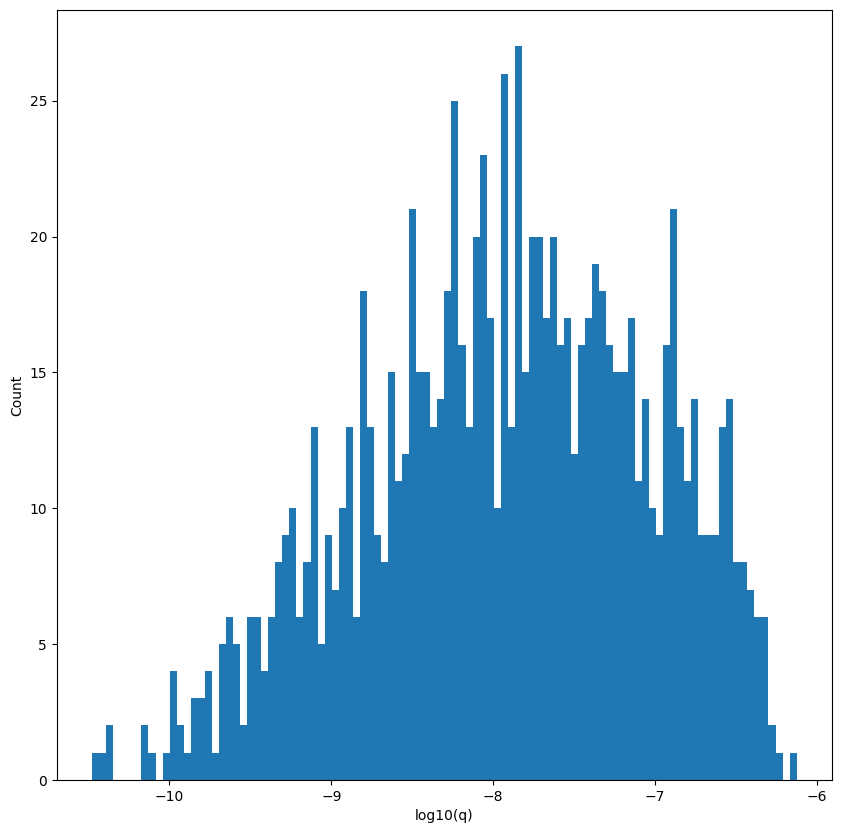

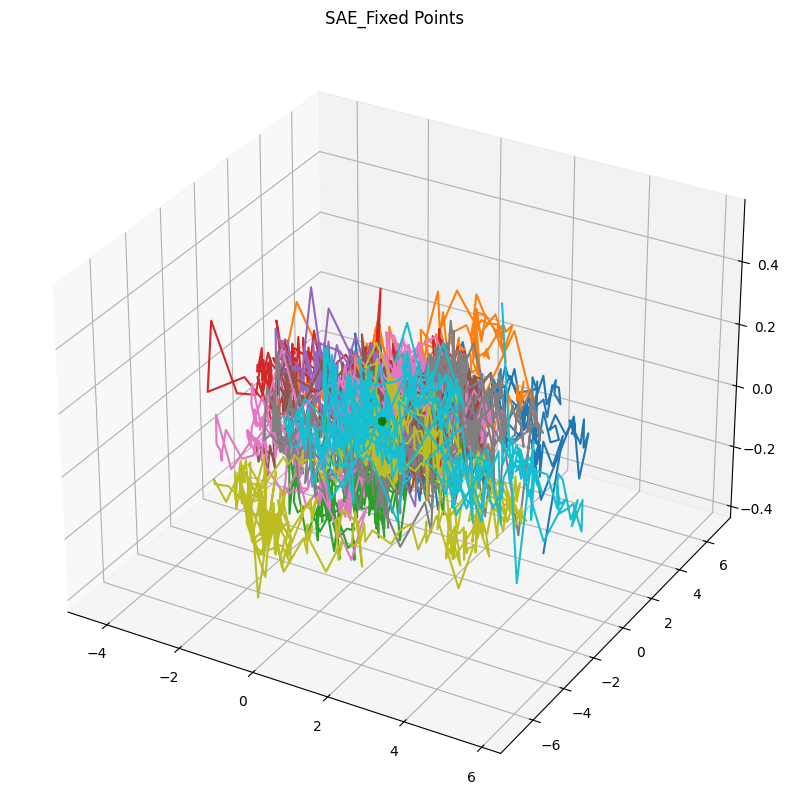

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)




Iteration 500/50000
q = 3.32E-04 +/- 1.11E-03
dq = 1.35E-06 +/- 4.92E-06

Iteration 1000/50000
q = 5.79E-05 +/- 3.10E-04
dq = 1.26E-07 +/- 6.90E-07

Iteration 1500/50000
q = 2.03E-05 +/- 1.81E-04
dq = 3.09E-08 +/- 2.35E-07

Iteration 2000/50000
q = 1.21E-05 +/- 1.67E-04
dq = 1.22E-08 +/- 1.42E-07

Iteration 2500/50000
q = 8.43E-06 +/- 1.58E-04
dq = 2.01E-09 +/- 2.73E-08

Iteration 3000/50000
q = 4.41E-06 +/- 1.19E-04
dq = 1.99E-09 +/- 3.71E-08

Iteration 3500/50000
q = 3.88E-06 +/- 1.17E-04
dq = 1.72E-09 +/- 4.15E-08

Iteration 4000/50000
q = 1.27E-07 +/- 2.93E-06
dq = 2.00E-10 +/- 4.77E-09

Iteration 4500/50000
q = 4.48E-08 +/- 1.43E-06
dq = 1.91E-10 +/- 6.11E-09

Iteration 5000/50000
q = 5.44E-12 +/- 1.73E-10
dq = 1.63E-13 +/- 5.19E-12

Iteration 5500/50000
q = 1.88E-14 +/- 6.67E-14
dq = 2.53E-16 +/- 2.97E-15

Iteration 6000/50000
q = 1.03E-14 +/- 3.84E-14
dq = 2.99E-16 +/- 2.85E-15

Iteration 6500/50000
q = 5.42E-15 +/- 2.09E-14
dq = 2.01E-16 +/- 1.38E-15

Iteration 7000/50000
q = 

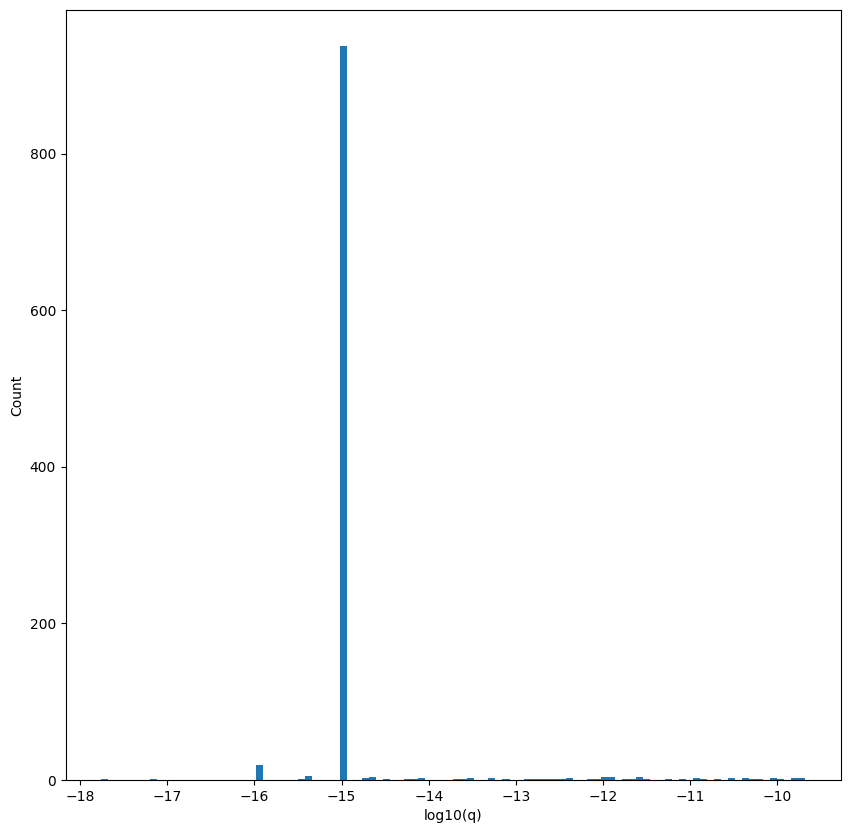

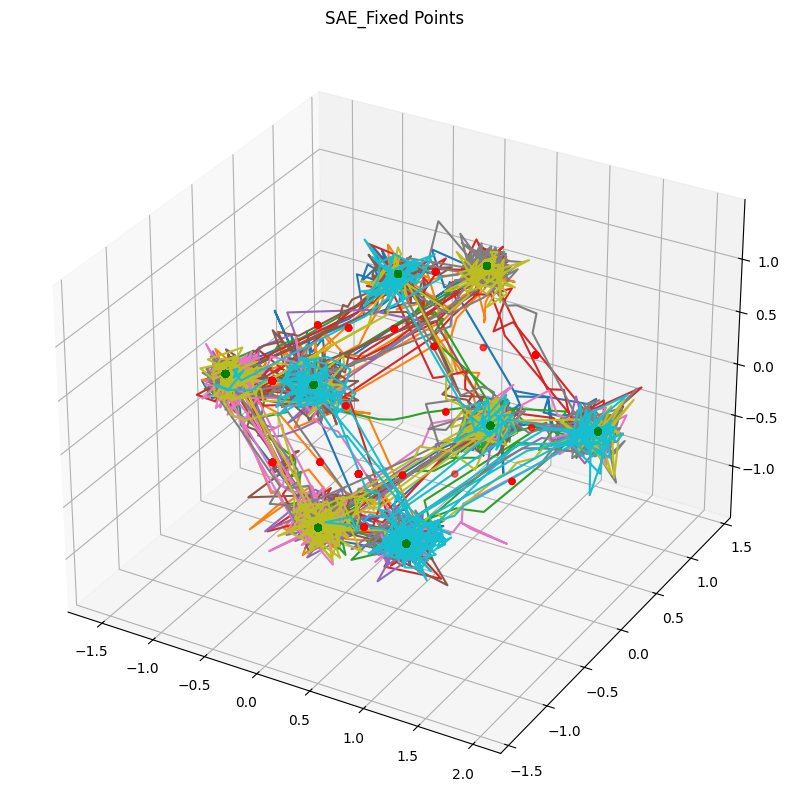

In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)


Iteration 500/50000
q = 6.31E-02 +/- 3.69E-01
dq = 2.09E-04 +/- 9.76E-04

Iteration 1000/50000
q = 1.83E-02 +/- 1.31E-01
dq = 3.48E-05 +/- 2.23E-04

Iteration 1500/50000
q = 7.85E-03 +/- 5.27E-02
dq = 1.11E-05 +/- 8.49E-05

Iteration 2000/50000
q = 4.32E-03 +/- 2.77E-02
dq = 4.55E-06 +/- 3.19E-05

Iteration 2500/50000
q = 2.68E-03 +/- 1.65E-02
dq = 2.33E-06 +/- 1.56E-05

Iteration 3000/50000
q = 1.79E-03 +/- 1.07E-02
dq = 1.35E-06 +/- 8.74E-06

Iteration 3500/50000
q = 1.25E-03 +/- 7.32E-03
dq = 8.41E-07 +/- 5.25E-06

Iteration 4000/50000
q = 9.11E-04 +/- 5.24E-03
dq = 5.59E-07 +/- 3.35E-06

Iteration 4500/50000
q = 6.77E-04 +/- 3.85E-03
dq = 3.91E-07 +/- 2.31E-06

Iteration 5000/50000
q = 5.10E-04 +/- 2.87E-03
dq = 2.83E-07 +/- 1.67E-06

Iteration 5500/50000
q = 3.88E-04 +/- 2.16E-03
dq = 2.09E-07 +/- 1.24E-06

Iteration 6000/50000
q = 2.98E-04 +/- 1.62E-03
dq = 1.57E-07 +/- 9.21E-07

Iteration 6500/50000
q = 2.29E-04 +/- 1.23E-03
dq = 1.19E-07 +/- 6.88E-07

Iteration 7000/50000
q = 

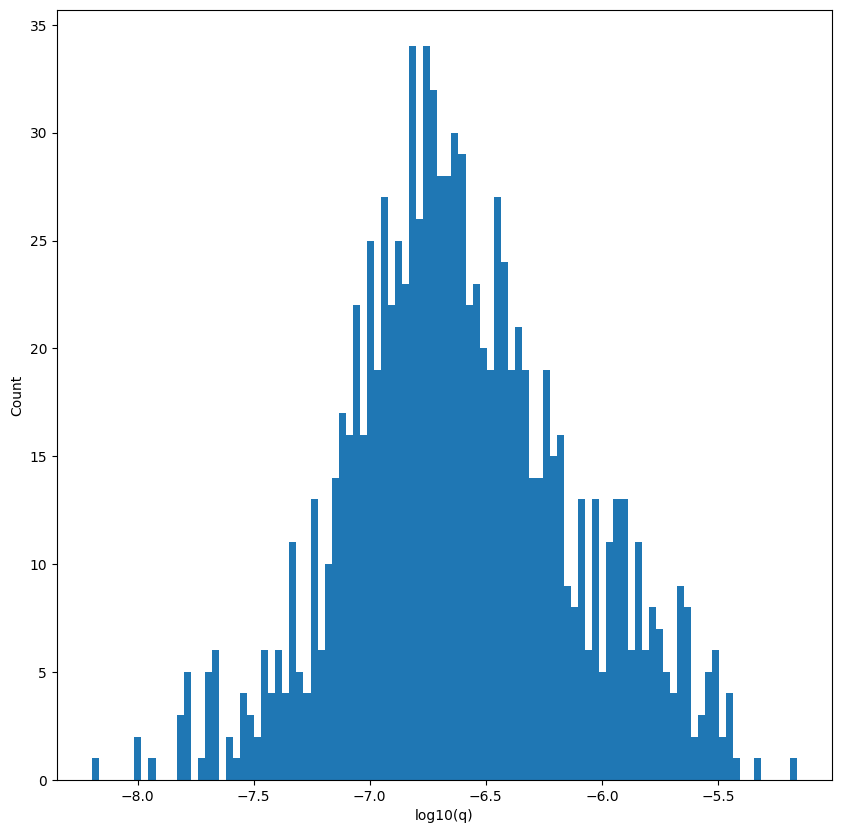

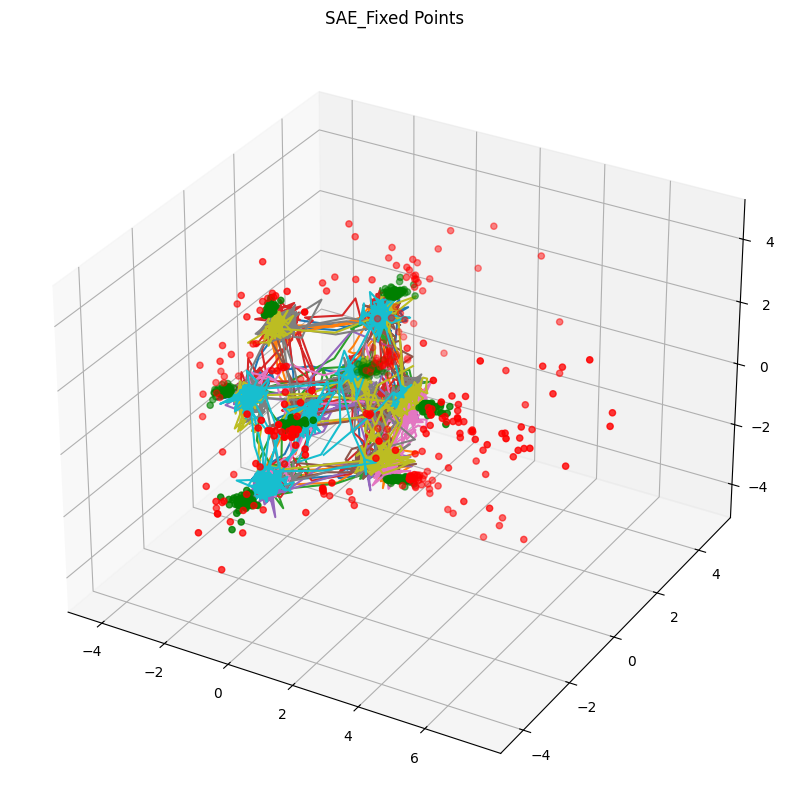

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

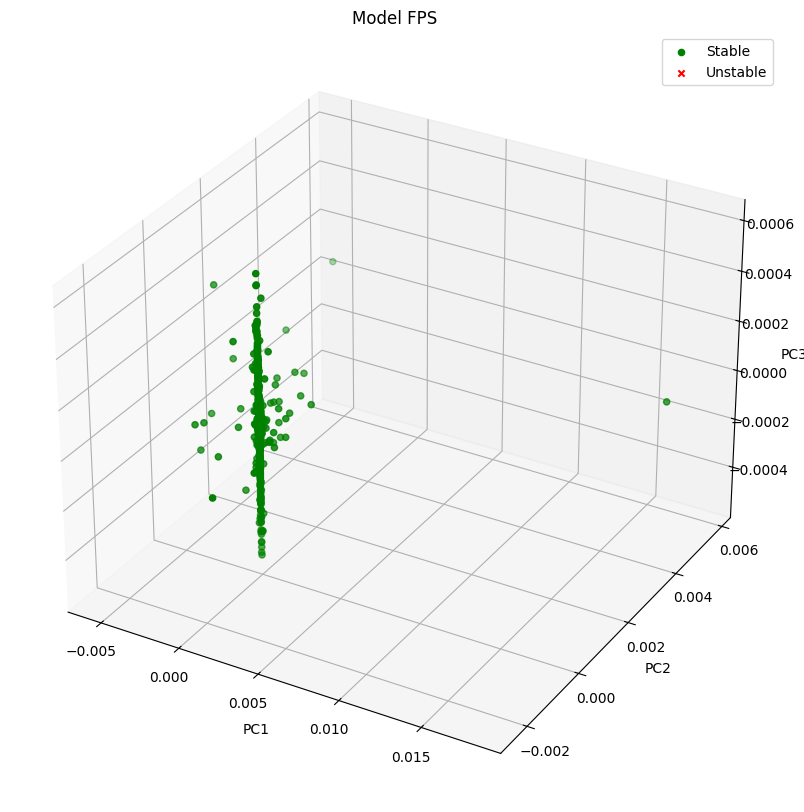

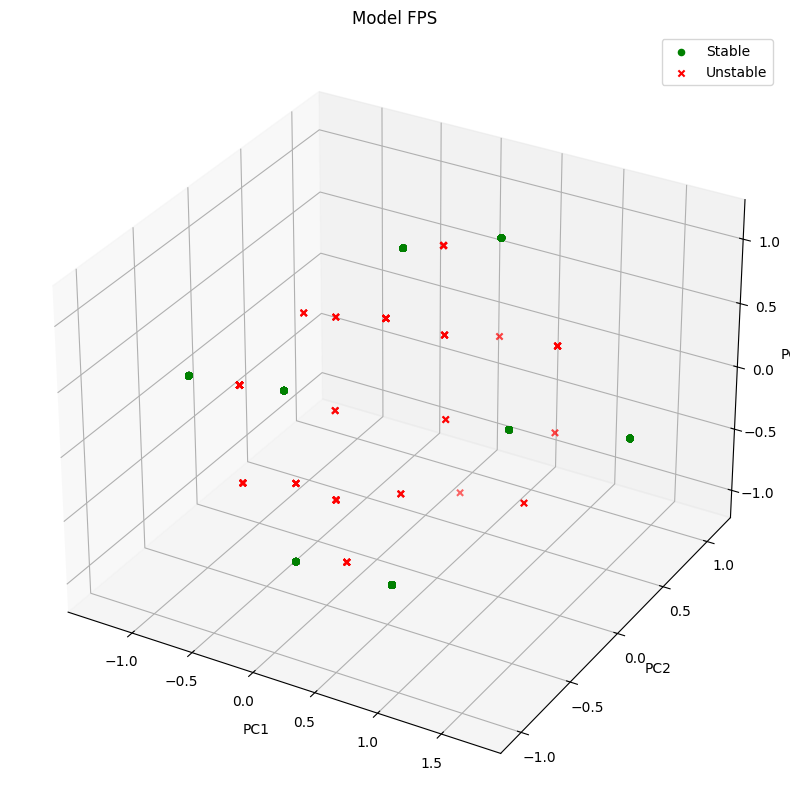

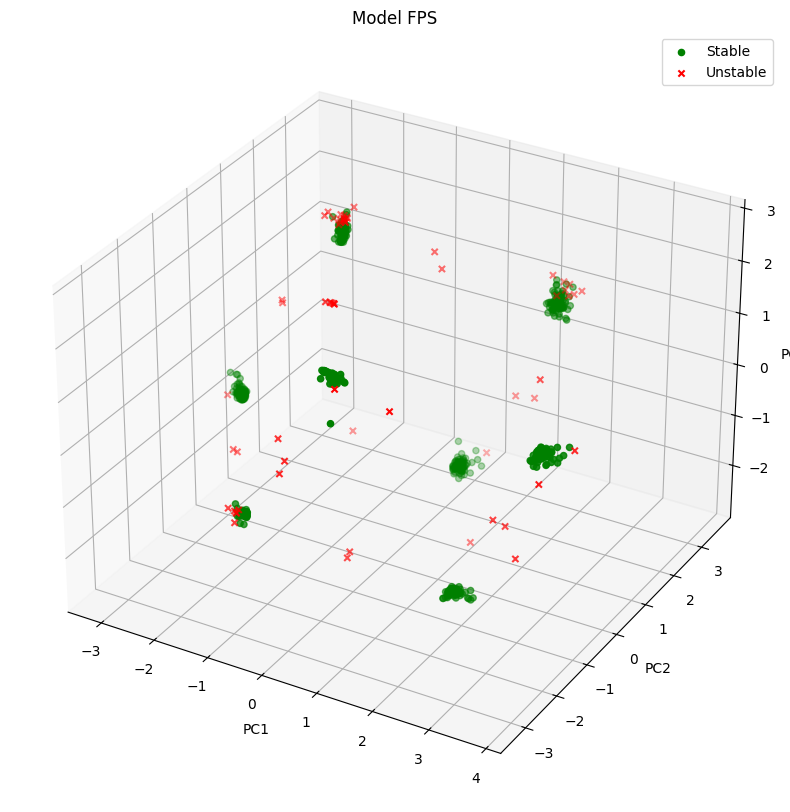

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)